## Logistic Regression
Logistic regression is a type of regression analysis that is used to predict the outcome of a categorical dependent 
variable based on one or more predictor variables. The goal of logistic regression is to estimate the probability of
an event occurring based on the values of the predictor variables.
Logistic Regression canbe used for
1. Binary Classification
2.  MultiClass Classification
3.  One-vs-Rest Classification
   

   ### Assumptions
   1. The dependent variable must be categorical in nature
   2.  The independent variables(features) must be independent
   3. There should be no outliers in the data.Check for Outliers.
   4.  The data should be normally distributed. Check for Normality.
   




In [39]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,LabelEncoder

In [40]:
## Load the data

df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
# Remove the 'deck' column from the dataframe
# df.drop('deck', axis=1, inplace=True)
df.drop('deck', axis=1, inplace=True)


# Fill missing values in the 'age' column with the median value of 'age'
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values in the 'fare' column with the median value of 'fare'
df['fare'].fillna(df['fare'].median(), inplace=True)

# Fill missing values in 'embark_town' with the most frequent value (mode)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Fill missing values in 'embarked' with the most frequent value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical columns (object or category type) using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    # Check if the column data type is 'object' or 'category'
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Apply label encoding to categorical columns
        df[col] = le.fit_transform(df[col])

# Display the modified dataframe
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,2,0,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,2,1,True
888,0,3,0,28.0,1,2,23.4500,2,2,2,False,2,0,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,0,1,True


In [42]:
# X and y columns
X=df.drop('survived',axis=1)
y=df['survived']

In [43]:
# train test split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [44]:
# model call
model=LogisticRegression()
model

LogisticRegression()

In [45]:
model.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [48]:
# evaluate the model
# model.evaluate(X_test, y_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print('Classsification Report: \n',classification_report(y_test,y_pred))


Accuracy Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
F1 Score: 1.0
Confusion Matrix: 
 [[117   0]
 [  0  62]]
Classsification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        62

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



<Axes: >

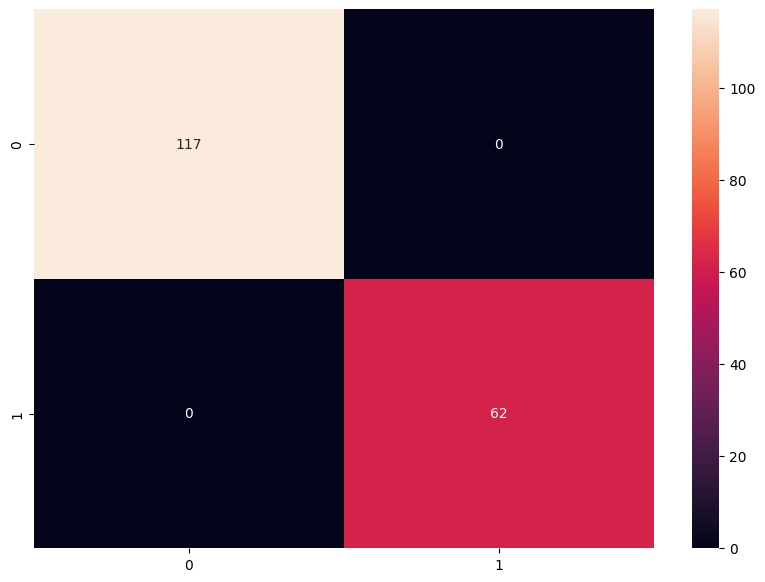

In [50]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d')


In [54]:
# save the model
import pickle
pickle.dump(model, open('./model02_logistic.pkl','wb'))